In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier


In [110]:
churn = pd.read_csv('data/churn_train.csv')

In [106]:
churn_tempo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avg_dist                40000 non-null  float64
 1   avg_rating_by_driver    39838 non-null  float64
 2   avg_rating_of_driver    33472 non-null  float64
 3   avg_surge               40000 non-null  float64
 4   city                    40000 non-null  object 
 5   last_trip_date          40000 non-null  object 
 6   phone                   39681 non-null  object 
 7   signup_date             40000 non-null  object 
 8   surge_pct               40000 non-null  float64
 9   trips_in_first_30_days  40000 non-null  int64  
 10  luxury_car_user         40000 non-null  bool   
 11  weekday_pct             40000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.4+ MB


In [104]:
churn_tempo=churn_tempo.drop(columns='Unnamed: 0')
churn_tempo

avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0          6.94                   5.0              5.000000       1.00   
1          8.06                   5.0              5.000000       1.00   
2         21.50                   4.0              4.601697       1.00   
3          9.46                   5.0              4.601697       2.75   
4         13.77                   5.0              4.601697       1.00   
...         ...                   ...                   ...        ...   
39995      2.06                   4.8              4.300000       1.08   
39996      2.05                   5.0              5.000000       1.00   
39997      3.04                   5.0              5.000000       1.00   
39998      3.49                   4.3              3.300000       1.50   
39999      4.25                   4.7              5.000000       1.00   

      last_trip_date signup_date  surge_pct  trips_in_first_30_days  \
0         2014-05-03  2014-01-12        0.0                       0   
1         2014-01-26  2014-01-25        0.0                       2   
2         2014-05-21  2014-01-02        0.0                       1   
3         2014-01-10  2014-01-09      100.0                       1   
4         2014-05-13  2014-01-31        0.0                       0   
...              ...         ...        ...                     ...   
39995     2014-04-02  2014-01-26        9.5                       8   
39996     2014-05-09  2014-01-08        0.0                       2   
39997     2014-06-24  2014-01-04        0.0                       3   
39998     2014-02-09  2014-01-08       40.0                       5   
39999     2014-06-27  2014-01-18        0.0                       2   

       luxury_car_user  weekday_pct  retention  rating_by_driver?  \
0                False        100.0      False              False   
1                 True          0.0      False              False   
2                 True        100.0      False              False   
3                False        100.0      False              False   
4                False        100.0      False              False   
...                ...          ...        ...                ...   
39995            False         90.5      False              False   
39996            False         85.7      False              False   
39997             True         33.3       True              False   
39998            False         60.0      False              False   
39999             True         42.9       True              False   

       rating_of_driver?  King's Landing  Winterfell  Android  iPhone  
0                  False               0           0        1       0  
1                  False               0           0        1       0  
2                   True               0           1        0       1  
3                   True               0           1        1       0  
4                   True               0           1        0       1  
...                  ...             ...         ...      ...     ...  
39995              False               0           1        1       0  
39996              False               1           0        0       1  
39997              False               0           1        1       0  
39998              False               0           0        0       1  
39999              False               0           0        0       1  

[40000 rows x 17 columns]

In [71]:
33472/40000

0.8368

In [111]:
churn['last_trip_date'] = pd.to_datetime(churn['last_trip_date'])
churn['signup_date'] = pd.to_datetime(churn['signup_date'])
# churn = churn.drop(columns='Unnamed: 0')

In [112]:
pd.unique(churn['phone'])

array(['Android', 'iPhone', nan], dtype=object)

In [113]:
churn[churn['phone'].isnull()]

avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
152        5.50                   4.8                   4.3       1.04   
178       12.68                   5.0                   NaN       2.00   
216        8.21                   5.0                   5.0       1.00   
239        6.52                   5.0                   4.0       1.00   
387        1.66                   4.5                   5.0       1.00   
...         ...                   ...                   ...        ...   
39234     12.63                   5.0                   NaN       1.00   
39305      9.35                   4.9                   4.8       1.02   
39444      5.93                   5.0                   5.0       1.00   
39515     34.22                   5.0                   4.7       1.00   
39613      2.29                   5.0                   NaN       1.00   

                 city last_trip_date phone signup_date  surge_pct  \
152    King's Landing     2014-06-28   NaN  2014-01-27        7.7   
178           Astapor     2014-01-12   NaN  2014-01-12      100.0   
216        Winterfell     2014-01-09   NaN  2014-01-09        0.0   
239           Astapor     2014-05-28   NaN  2014-01-08        0.0   
387        Winterfell     2014-06-06   NaN  2014-01-17        0.0   
...               ...            ...   ...         ...        ...   
39234      Winterfell     2014-01-28   NaN  2014-01-28        0.0   
39305      Winterfell     2014-06-29   NaN  2014-01-19        7.1   
39444         Astapor     2014-01-31   NaN  2014-01-29        0.0   
39515      Winterfell     2014-05-30   NaN  2014-01-15        0.0   
39613         Astapor     2014-01-09   NaN  2014-01-08        0.0   

       trips_in_first_30_days  luxury_car_user  weekday_pct  
152                         1             True         76.9  
178                         1            False          0.0  
216                         1             True        100.0  
239                         0             True        100.0  
387                         1            False        100.0  
...                       ...              ...          ...  
39234                       1            False        100.0  
39305                       5             True         50.0  
39444                       1             True        100.0  
39515                       0            False        100.0  
39613                       1            False        100.0  

[319 rows x 12 columns]

In [68]:
len(X_test)

10000

In [114]:
churn['phone'].fillna('Other', inplace = True)

In [14]:
pd.unique(churn['phone'])

array(['Android', 'iPhone', 'Other'], dtype=object)

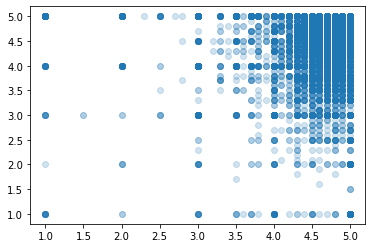

In [17]:
plt.scatter(churn['avg_rating_by_driver'], churn['avg_rating_of_driver'], alpha = 0.2)

In [21]:
drop_idx = churn[(churn['avg_rating_by_driver'].isnull()) & (churn['avg_rating_of_driver'].isnull())].index

In [22]:
churn = churn.drop(index = drop_idx, axis = 1)

In [115]:
churn['retention'] =(churn['last_trip_date'] >= '2014-06-01')

Astapor                AxesSubplot(0.1,0.559091;0.363636x0.340909)
King's Landing    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
Winterfell                 AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

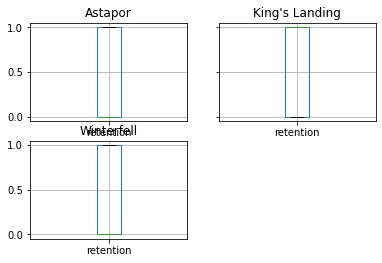

In [127]:
churn[['city', 'retention']].groupby('city').boxplot()

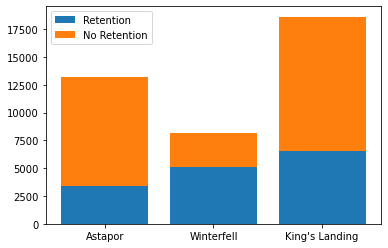

In [144]:
asta_retention = churn[churn['retention'] & (churn['city'] == 'Astapor')]['retention'].count()
asta_no_ret = len(churn[churn['city'] == 'Astapor']['retention']) - asta_retention
king_retention = churn[churn['retention'] & (churn['city'] == "King's Landing")]['retention'].count()
king_no_ret = len(churn[churn['city'] == "King's Landing"]['retention']) - king_retention
winter_retention = churn[churn['retention'] & (churn['city'] == 'Winterfell')]['retention'].count()
winter_no_ret = len(churn[churn['city'] == 'Winterfell']['retention']) - winter_retention
plt.bar(pd.unique(churn['city']), [asta_retention, king_retention, winter_retention], label = 'Retention')
plt.bar(pd.unique(churn['city']), [asta_no_ret, king_no_ret, winter_no_ret],  bottom = [asta_retention, king_retention, winter_retention] , label = 'No Retention')
plt.legend()
# churn[['city', 'retention']]

In [146]:
print([asta_retention, king_retention, winter_retention])
[asta_no_ret, king_no_ret, winter_no_ret]

[3373, 5113, 6546]


[9863, 3031, 12074]

In [28]:
churn.avg_rating_by_driver.mean()

4.777433606104486

In [29]:
churn.avg_rating_of_driver.mean()

4.601696940726505

In [90]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Unnamed: 0              40000 non-null  int64         
 1   avg_dist                40000 non-null  float64       
 2   avg_rating_by_driver    40000 non-null  float64       
 3   avg_rating_of_driver    40000 non-null  float64       
 4   avg_surge               40000 non-null  float64       
 5   last_trip_date          40000 non-null  datetime64[ns]
 6   signup_date             40000 non-null  datetime64[ns]
 7   surge_pct               40000 non-null  float64       
 8   trips_in_first_30_days  40000 non-null  int64         
 9   luxury_car_user         40000 non-null  bool          
 10  weekday_pct             40000 non-null  float64       
 11  retention               40000 non-null  bool          
 12  rating_by_driver?       40000 non-null  bool  

In [94]:
pd.plotting.scatter_matrix(churn)

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [36]:

plt.bar(churn['avg_rating_by_driver'], churn['retention'])

KeyboardInterrupt: 

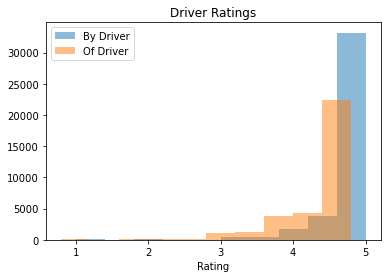

In [84]:
plt.hist(churn_tempo['avg_rating_by_driver'], alpha = 0.5, label="By Driver")
plt.hist(churn_tempo['avg_rating_of_driver'], align = 'left', alpha = 0.5, label="Of Driver")
plt.legend()
plt.xlabel("Rating")
plt.title("Driver Ratings")
plt.savefig('img/driver_ratings.png')

In [38]:
def threshold_calc(col):
    thresholds = np.linspace(5, 1, num = 41)
    # print(thresholds)
    lst = []

    for threshold in thresholds:
        total = (col >= threshold).sum()
        percent = total/len(col)
        lst.append([threshold, total, percent])

    return np.array(lst)

In [39]:
lst = threshold_calc(churn['avg_rating_of_driver'])

for j in range(6):
    print(lst[j][0], lst[j][1], lst[j][2])

5.0 16577.0 0.414425
4.9 18002.0 0.45005
4.8 19950.0 0.49875
4.7 21504.0 0.5376
4.6 28944.0 0.7236
4.5 30917.0 0.772925


In [40]:
by_ = threshold_calc(churn['avg_rating_by_driver'])

for j in range(6):
    print(by_[j][0], by_[j][1], by_[j][2])

5.0 22808.0 0.5702
4.9 25273.0 0.631825
4.8 28864.0 0.7216
4.7 31698.0 0.79245
4.6 33339.0 0.833475
4.5 35297.0 0.882425


In [93]:
churn.corr()

Unnamed: 0  avg_dist  avg_rating_by_driver  \
Unnamed: 0                1.000000  0.000417          1.022866e-03   
avg_dist                  0.000417  1.000000          8.137975e-02   
avg_rating_by_driver      0.001023  0.081380          1.000000e+00   
avg_rating_of_driver      0.004911  0.030450          9.776183e-02   
avg_surge                 0.002175 -0.079488          7.777412e-03   
surge_pct                -0.001271 -0.102349          1.870877e-02   
trips_in_first_30_days   -0.004530 -0.135228         -3.926402e-02   
luxury_car_user          -0.006620  0.025824          1.028325e-02   
weekday_pct              -0.002509  0.097445          2.147074e-02   
retention                 0.005218 -0.093371         -2.741537e-02   
rating_by_driver?        -0.001638  0.006097         -3.371841e-14   
rating_of_driver?        -0.010510  0.128977          6.388280e-03   
King's Landing            0.004307  0.013527          8.284970e-02   
Winterfell               -0.007674  0.031272         -9.989827e-02   
Android                  -0.001701  0.019800          4.643463e-03   
iPhone                    0.001074 -0.023702         -5.777249e-03   

                        avg_rating_of_driver  avg_surge  surge_pct  \
Unnamed: 0                      4.911223e-03   0.002175  -0.001271   
avg_dist                        3.045004e-02  -0.079488  -0.102349   
avg_rating_by_driver            9.776183e-02   0.007777   0.018709   
avg_rating_of_driver            1.000000e+00  -0.027851  -0.008782   
avg_surge                      -2.785072e-02   1.000000   0.793842   
surge_pct                      -8.781662e-03   0.793842   1.000000   
trips_in_first_30_days         -1.342610e-02  -0.001829   0.004746   
luxury_car_user                 1.615466e-03  -0.075544  -0.103531   
weekday_pct                     1.137330e-02  -0.113054  -0.147969   
retention                      -1.198204e-02  -0.003146   0.011551   
rating_by_driver?              -6.773953e-03   0.030417   0.026194   
rating_of_driver?              -4.757892e-14   0.008650  -0.003616   
King's Landing                  8.600105e-02  -0.007347   0.028099   
Winterfell                     -9.519467e-02  -0.028452  -0.065744   
Android                         2.781450e-02  -0.009684  -0.011386   
iPhone                         -2.800604e-02   0.011530   0.013835   

                        trips_in_first_30_days  luxury_car_user  weekday_pct  \
Unnamed: 0                           -0.004530        -0.006620    -0.002509   
avg_dist                             -0.135228         0.025824     0.097445   
avg_rating_by_driver                 -0.039264         0.010283     0.021471   
avg_rating_of_driver                 -0.013426         0.001615     0.011373   
avg_surge                            -0.001829        -0.075544    -0.113054   
surge_pct                             0.004746        -0.103531    -0.147969   
trips_in_first_30_days                1.000000         0.114741     0.049731   
luxury_car_user                       0.114741         1.000000     0.033478   
weekday_pct                           0.049731         0.033478     1.000000   
retention                             0.210677         0.206902     0.008383   
rating_by_driver?                    -0.028658        -0.026764    -0.013390   
rating_of_driver?                    -0.195383        -0.035403    -0.023297   
King's Landing                        0.022333         0.039428     0.031314   
Winterfell                            0.037260        -0.053481    -0.012731   
Android                              -0.057818        -0.073530    -0.008750   
iPhone                                0.056907         0.064507     0.005988   

                        retention  rating_by_driver?  rating_of_driver?  \
Unnamed: 0               0.005218      -1.637878e-03      -1.051019e-02   
avg_dist                -0.093371       6.096881e-03       1.289767e-01   
avg_rating_by_driver    -0.027415      -3.371841e-14    

In [96]:
churn[churn['avg_rating_of_driver'].isnull()]['retention'].sum()#/len(churn[churn['avg_rating_of_driver'].isnull()]['retention'])

0

In [79]:
churn[~churn['avg_rating_of_driver'].isnull()]['retention'].sum()/len(churn[~churn['avg_rating_of_driver'].isnull()]['retention'])

0.40932719885277247

In [81]:
churn[churn['avg_rating_by_driver'].isnull()]['retention'].sum()/len(churn[churn['avg_rating_by_driver'].isnull()]['retention'])

0.10476190476190476

In [82]:
churn[~churn['avg_rating_by_driver'].isnull()]['retention'].sum()/len(churn[~churn['avg_rating_by_driver'].isnull()]['retention'])

0.3765249259500979

In [80]:
39681-40000 #- len(churn_tempo[~churn_tempo['avg_rating_of_driver'].isnull()])

-319

In [81]:
churn_tempo.describe()

avg_dist  avg_rating_by_driver  avg_rating_of_driver     avg_surge  \
count  40000.000000          39838.000000          33472.000000  40000.000000   
mean       5.791302              4.777434              4.601697      1.074956   
std        5.708056              0.448088              0.614810      0.222427   
min        0.000000              1.000000              1.000000      1.000000   
25%        2.420000              4.700000              4.300000      1.000000   
50%        3.880000              5.000000              4.900000      1.000000   
75%        6.930000              5.000000              5.000000      1.050000   
max      160.960000              5.000000              5.000000      8.000000   

          surge_pct  trips_in_first_30_days   weekday_pct  
count  40000.000000            40000.000000  40000.000000  
mean       8.857342                2.280700     60.874382  
std       20.014008                3.811289     37.089619  
min        0.000000                0.000000      0.000000  
25%        0.000000                0.000000     33.300000  
50%        0.000000                1.000000     66.700000  
75%        8.300000                3.000000    100.000000  
max      100.000000              125.000000    100.000000

In [85]:
churn.head()

avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0      6.94                   5.0                   5.0       1.00   
1      8.06                   5.0                   5.0       1.00   
2     21.50                   4.0                   NaN       1.00   
3      9.46                   5.0                   NaN       2.75   
4     13.77                   5.0                   NaN       1.00   

         city last_trip_date    phone signup_date  surge_pct  \
0     Astapor     2014-05-03  Android  2014-01-12        0.0   
1     Astapor     2014-01-26  Android  2014-01-25        0.0   
2  Winterfell     2014-05-21   iPhone  2014-01-02        0.0   
3  Winterfell     2014-01-10  Android  2014-01-09      100.0   
4  Winterfell     2014-05-13   iPhone  2014-01-31        0.0   

   trips_in_first_30_days  luxury_car_user  weekday_pct  retention  
0                       0            False        100.0      False  
1                       2             True          0.0      False  
2                       1             True        100.0      False  
3                       1            False        100.0      False  
4                       0            False        100.0      False

In [84]:
pd.unique(churn['city'])

array(['Astapor', 'Winterfell', "King's Landing"], dtype=object)

In [41]:


X_train = churn.drop(columns=['retention', 'last_trip_date', 'signup_date'])
y_train = churn['retention']


In [42]:
churn_test = pd.read_csv('data/churn_test.csv')
churn_test['last_trip_date'] = pd.to_datetime(churn_test['last_trip_date'])
churn_test['signup_date'] = pd.to_datetime(churn_test['signup_date'])
churn_test['phone'].fillna('Other', inplace = True)
churn_test['retention'] = churn_test['last_trip_date'] >= '2014-06-01' 
churn_test['rating_by_driver?'] = churn_test['avg_rating_by_driver'].isnull()
churn_test['rating_of_driver?'] = churn_test['avg_rating_of_driver'].isnull()
churn_test['avg_rating_by_driver'].fillna(churn_test['avg_rating_by_driver'].mean(), inplace = True)
churn_test['avg_rating_of_driver'].fillna(churn_test['avg_rating_of_driver'].mean(), inplace = True)
churn_test[["King's Landing", "Winterfell"]] = pd.get_dummies(churn_test['city'], drop_first = True)
churn_test[['Android', 'iPhone']] = pd.get_dummies(churn_test['phone']).drop('Other', axis=1)
churn_test.drop(['city', 'phone'], axis = 1, inplace = True)
# churn_test.to_csv('data/cleaned_churn_test.csv')

In [43]:
X_test = churn_test.drop(columns=['retention', 'last_trip_date', 'signup_date'])
y_test = churn_test['retention']

# Linear Regression Approach 

In [44]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [45]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix

scoring = {'acc': 'accuracy',
           'prec': 'precision',
           'rec': 'recall'}


scores = cross_validate(LogisticRegression(), X_train, y_train, scoring=scoring,
                         cv=10, return_train_score=True)
print(scores.keys())
print("Accuracy", np.mean(scores['test_acc']))
print("Precision", np.mean(scores['test_prec']))
print("Recall", np.mean(scores['test_rec']))

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_hat = log_reg.predict(X_test)

confusion_matrix(y_test, y_hat)

dict_keys(['fit_time', 'score_time', 'test_acc', 'train_acc', 'test_prec', 'train_prec', 'test_rec', 'train_rec'])
Accuracy 0.72505
Precision 0.6796086515017288
Recall 0.5076504349457115


array([[5270,  958],
       [1909, 1863]])

In [3]:
churn_train = pd.read_csv('data/churn_train.csv')
churn_train['last_trip_date'] = pd.to_datetime(churn_train['last_trip_date'])
churn_train['signup_date'] = pd.to_datetime(churn_train['signup_date'])
churn_train['phone'].fillna('Other', inplace = True)
churn_train['retention'] = churn_train['last_trip_date'] >= '2014-06-01' 
churn_train['rating_by_driver?'] = churn_train['avg_rating_by_driver'].isnull()
churn_train['rating_of_driver?'] = churn_train['avg_rating_of_driver'].isnull()

churn_train[["King's Landing", "Winterfell"]] = pd.get_dummies(churn_train['city'], drop_first = True)
churn_train[['Android', 'iPhone']] = pd.get_dummies(churn_train['phone']).drop('Other', axis=1)
churn_train.drop(['city', 'phone'], axis = 1, inplace = True)
# churn_train.to_csv('data/cleaned_churn_align.csv')

In [4]:
test = churn_train[(churn_train['avg_rating_by_driver'].isnull()) & (churn_train['avg_rating_of_driver'].isnull() == False)]['avg_rating_of_driver']
test2 = churn_train[(churn_train['avg_rating_of_driver'].isnull()) & (churn_train['avg_rating_by_driver'].isnull() == False)]['avg_rating_by_driver']
# churn_train[['avg_rating_of_driver', 'avg_rating_of_driver']].apply(lambda x: print(x))

In [5]:
churn_train.loc[test.index, 'avg_rating_by_driver'] = test.values
churn_train.loc[test2.index, 'avg_rating_of_driver'] = test2.values
churn_train['avg_rating_by_driver'].fillna(churn_train['avg_rating_by_driver'].mean(), inplace = True)
churn_train['avg_rating_of_driver'].fillna(churn_train['avg_rating_of_driver'].mean(), inplace = True)
earliest = churn_train['signup_date'].min().toordinal()
churn_train['signup_date'] = churn_train['signup_date'].apply(lambda x: x.toordinal() - earliest)

In [6]:
churn_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   avg_dist                40000 non-null  float64       
 1   avg_rating_by_driver    40000 non-null  float64       
 2   avg_rating_of_driver    40000 non-null  float64       
 3   avg_surge               40000 non-null  float64       
 4   last_trip_date          40000 non-null  datetime64[ns]
 5   signup_date             40000 non-null  int64         
 6   surge_pct               40000 non-null  float64       
 7   trips_in_first_30_days  40000 non-null  int64         
 8   luxury_car_user         40000 non-null  bool          
 9   weekday_pct             40000 non-null  float64       
 10  retention               40000 non-null  bool          
 11  rating_by_driver?       40000 non-null  bool          
 12  rating_of_driver?       40000 non-null  bool  

In [92]:
from sklearn.model_selection import cross_validate
# X_train = churn_train.drop(columns=['retention', 'last_trip_date'])
# y_train = churn_train['retention']

# scoring = {'acc': 'accuracy',
#            'prec': 'precision',
#            'rec': 'recall'}


# scores = cross_validate(RandomForestClassifier(), X_train, y_train, scoring=scoring,
#                          cv=10, return_train_score=True)
# print(scores.keys())
# print("Accuracy", np.mean(scores['test_acc']))
# print("Precision", np.mean(scores['test_prec']))
# print("Recall", np.mean(scores['test_rec']))

gbc = RandomForestClassifier()
gbc.fit(X_train, y_train)
y_gbc = gbc.predict_proba(X_test)[:,1]

# confusion_matrix(y_test, y_hat)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_rfc = rfc.predict_proba(X_test)[:,1]

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_log = log_reg.predict_proba(X_test)[:,1]
# confusion_matrix(y_test, y_hat)

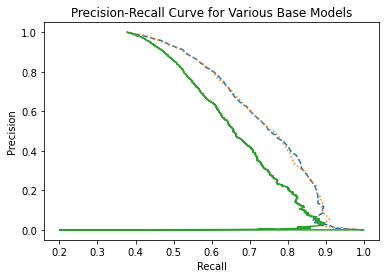

In [100]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, precision_recall_curve, auc
plt.figure(0).clf()

fpr, tpr, thresh = precision_recall_curve(y_test, y_gbc)
auc_ = auc(tpr, fpr)
plt.plot(fpr,tpr,label="Gradient Boost, auc="+str(round(auc_,4)), linestyle = '--')

fpr, tpr, thresh = precision_recall_curve(y_test, y_rfc)
auc_ = auc(tpr, fpr)
plt.plot(fpr,tpr,label="Random Forest, auc="+str(round(auc_,4)), linestyle = ':')

fpr, tpr, _ = precision_recall_curve(y_test, y_log) #precision, recall
auc_ = auc(tpr, fpr)
plt.plot(fpr,tpr,label="Logistic Regression, auc="+str(round(auc_,4)))
plt.title('Precision-Recall Curve for Various Base Models')
plt.ylabel("Precision")
plt.xlabel("Recall")
# plt.legend()
plt.savefig('img/precision_recall_curve.png')

# plot_roc_curve(rfc, X_test, y_test)
#Use precision/ recall
#Know what method you are using to present.

In [197]:
churn_train

avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0          6.94                   5.0                   5.0       1.00   
1          8.06                   5.0                   5.0       1.00   
2         21.50                   4.0                   4.0       1.00   
3          9.46                   5.0                   5.0       2.75   
4         13.77                   5.0                   5.0       1.00   
...         ...                   ...                   ...        ...   
39995      2.06                   4.8                   4.3       1.08   
39996      2.05                   5.0                   5.0       1.00   
39997      3.04                   5.0                   5.0       1.00   
39998      3.49                   4.3                   3.3       1.50   
39999      4.25                   4.7                   5.0       1.00   

      last_trip_date signup_date  surge_pct  trips_in_first_30_days  \
0         2014-05-03  2014-01-12        0.0                       0   
1         2014-01-26  2014-01-25        0.0                       2   
2         2014-05-21  2014-01-02        0.0                       1   
3         2014-01-10  2014-01-09      100.0                       1   
4         2014-05-13  2014-01-31        0.0                       0   
...              ...         ...        ...                     ...   
39995     2014-04-02  2014-01-26        9.5                       8   
39996     2014-05-09  2014-01-08        0.0                       2   
39997     2014-06-24  2014-01-04        0.0                       3   
39998     2014-02-09  2014-01-08       40.0                       5   
39999     2014-06-27  2014-01-18        0.0                       2   

       luxury_car_user  weekday_pct  retention  rating_by_driver?  \
0                False        100.0      False              False   
1                 True          0.0      False              False   
2                 True        100.0      False              False   
3                False        100.0      False              False   
4                False        100.0      False              False   
...                ...          ...        ...                ...   
39995            False         90.5      False              False   
39996            False         85.7      False              False   
39997             True         33.3       True              False   
39998            False         60.0      False              False   
39999             True         42.9       True              False   

       rating_of_driver?  King's Landing  Winterfell  Android  iPhone  
0                  False               0           0        1       0  
1                  False               0           0        1       0  
2                   True               0           1        0       1  
3                   True               0           1        1       0  
4                   True               0           1        0       1  
...                  ...             ...         ...      ...     ...  
39995              False               0           1        1       0  
39996              False               1           0        0       1  
39997              False               0           1        1       0  
39998              False               0           0        0       1  
39999              False               0           0        0       1  

[40000 rows x 17 columns]

In [14]:
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV

gradient_boosting_grid = {'learning_rate': [0.1, 0.05, 0.01],
                          'max_depth': [4],
                          'max_features': ['sqrt',None],
                          'n_estimators': [100],
                          'random_state': [1]}
grid_seearch_boosted_cleaned = GridSearchCV(estimator=GradientBoostingClassifier(), 
                                            n_jobs = -1,
                                            param_grid=gradient_boosting_grid, 
                                             cv=5, verbose=True, return_train_score=True)

tqdm(grid_seearch_boosted_cleaned.fit(X_train,y_train))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0it [00:00, ?it/s]

In [16]:
grid_seearch_boosted_cleaned.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'max_features': None,
 'n_estimators': 100,
 'random_state': 1}

In [17]:
grid_seearch_boosted_cleaned.best_score_

0.7899750000000001